In [1]:
using RegularizedSystems
using VSTom
using PyPlot

  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:438
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:438
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/lstagner/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/lstagner/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl, in expression starting on line 429
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:429
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:429
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:429
 

In [2]:
b = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557F00_fi_1_wght_2241ms.cdf")
a = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557F00_fi_2_wght_2271ms.cdf")
dw = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/Asger\ source\ code/31557_dW.nc")
spec = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557_measured_spectra.cdf")
true_dists = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557_true_distributions.nc")

  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely n

Dict{AbstractString,Any} with 12 entries:
  "True_before_coarse"     => 20x20 Array{Float64,2}:…
  "Maxwellian_after"       => 50x50 Array{Float64,2}:…
  "p_coarse"               => [-0.9599999785423279,-0.8589473366737366,-0.75789…
  "True_before_coarse_cut" => 20x20 Array{Float64,2}:…
  "True_after_coarse"      => 20x20 Array{Float64,2}:…
  "TRANSP_before"          => 50x50 Array{Float64,2}:…
  "E_coarse"               => [1.0,6.210526466369629,11.421052932739258,16.6315…
  "E"                      => [1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0  … …
  "True_after_coarse_cut"  => 20x20 Array{Float64,2}:…
  "TRANSP_after"           => 50x50 Array{Float64,2}:…
  "Maxwellian_before"      => 50x50 Array{Float64,2}:…
  "p"                      => [-0.98,-0.94,-0.9,-0.86,-0.82,-0.78,-0.74,-0.7,-0…

In [3]:
energy = map(Float64,b["energy"])
pitch = map(Float64,b["pitch"])
wl = map(Float64,b["central_wavel"])
wght_b = map(Float64,b["weight"])
wght_a = map(Float64,a["weight"]);

In [4]:
bb = read_ncdf("data/before_sawtooth_transfer_matrix.cdf")
ind1 = round(Int64,bb["spectrum_1_index"])
ind2 = round(Int64,bb["spectrum_2_index"])
ind3 = round(Int64,bb["spectrum_3_index"])
ind4 = round(Int64,bb["spectrum_4_index"])
ind5 = round(Int64,bb["spectrum_5_index"]);

In [5]:
spec1_b = map(Float64,spec["intens"][1,ind1,1]')
spec1_a = map(Float64,spec["intens"][1,ind1,2]')
err1_b  = map(Float64,spec["error"][1,ind1,1]')
err1_a  = map(Float64,spec["error"][1,ind1,2]')
wl1 = map(Float64,spec["central_wavel"][1,ind1]')

spec2_b = map(Float64,spec["intens"][2,ind2,1]')
spec2_a = map(Float64,spec["intens"][2,ind2,2]')
err2_b  = map(Float64,spec["error"][2,ind2,1]')
err2_a  = map(Float64,spec["error"][2,ind2,2]')
wl2 = map(Float64,spec["central_wavel"][2,ind2]')

spec3_b = map(Float64,spec["intens"][3,ind3,1]')
spec3_a = map(Float64,spec["intens"][3,ind3,2]')
err3_b  = map(Float64,spec["error"][3,ind3,1]')
err3_a  = map(Float64,spec["error"][3,ind3,2]')
wl3 = map(Float64,spec["central_wavel"][3,ind3]')

spec4_b = map(Float64,spec["intens"][4,ind4,1]')
spec4_a = map(Float64,spec["intens"][4,ind4,2]')
err4_b  = map(Float64,spec["error"][4,ind4,1]')
err4_a  = map(Float64,spec["error"][4,ind4,2]')
wl4 = map(Float64,spec["central_wavel"][4,ind4]')

spec5_b = map(Float64,spec["intens"][5,ind5,1]')
spec5_a = map(Float64,spec["intens"][5,ind5,2]')
err5_b  = map(Float64,spec["error"][5,ind5,1]')
err5_a  = map(Float64,spec["error"][5,ind5,2]')
wl5 = map(Float64,spec["central_wavel"][5,ind5]');

In [6]:
E = energy .< 100
energy = energy[E]
nen =length(energy)

50

In [7]:
A1_b = zeros(length(wl1),nen*75)
A1_a = zeros(length(wl1),nen*75)
dwav = abs(wl1[2] - wl1[1])
for i=1:length(wl1)
    ind = indmin((wl .- wl1[i]).^2)
    A1_b[i,:] = reshape(reshape(wght_b[1,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A1_a[i,:] = reshape(reshape(wght_a[1,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [8]:
A2_b = zeros(length(wl2),nen*75)
A2_a = zeros(length(wl2),nen*75)
dwav = abs(wl2[2] - wl2[1])
for i=1:length(wl2)
    ind = indmin((wl .- wl2[i]).^2)
    A2_b[i,:] = reshape(reshape(wght_b[2,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A2_a[i,:] = reshape(reshape(wght_a[2,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [9]:
A3_b = zeros(length(wl3),nen*75)
A3_a = zeros(length(wl3),nen*75)
dwav = abs(wl3[2] - wl3[1])
for i=1:length(wl3)
    ind = indmin((wl .- wl3[i]).^2)
    A3_b[i,:] = reshape(reshape(wght_b[3,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A3_a[i,:] = reshape(reshape(wght_a[3,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [10]:
A4_b = zeros(length(wl4),nen*75)
A4_a = zeros(length(wl4),nen*75)
dwav = abs(wl4[2] - wl4[1])
for i=1:length(wl4)
    ind = indmin((wl .- wl4[i]).^2)
    A4_b[i,:] = reshape(reshape(wght_b[4,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A4_a[i,:] = reshape(reshape(wght_a[4,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [11]:
A5_b = zeros(length(wl5),nen*75)
A5_a = zeros(length(wl5),nen*75)
dwav = abs(wl5[2] - wl5[1])
for i=1:length(wl5)
    ind = indmin((wl .- wl5[i]).^2)
    A5_b[i,:] = reshape(reshape(wght_b[5,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi)) 
    A5_a[i,:] = reshape(reshape(wght_a[5,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi)) #(Ph*cm^3)/(m^2 *s*dE*dP*sr*nm)
end

In [12]:
dwav = wl
A_b = vcat(A1_b,A2_b,A3_b,A4_b,A5_b)
A_a = vcat(A1_a,A2_a,A3_a,A4_a,A5_a)
spec_b = reshape(vcat(spec1_b,spec2_b,spec3_b,spec4_b,spec5_b),1116)
err_b = reshape(vcat(err1_b,err2_b,err3_b,err4_b,err5_b),1116)
wavelength = vcat(wl1,wl2,wl3,wl4,wl5)
#err_b = spec_err["noise_before"]
spec_a = reshape(vcat(spec1_a,spec2_a,spec3_a,spec4_a,spec5_a),1116)
err_a = reshape(vcat(err1_a,err2_a,err3_a,err4_a,err5_a),1116);
#err_a = spec_err["noise_after"];

In [13]:
energy_50 = dw["E"]
pitch_50 = dw["p"]
A_b = resize_transfer_matrix(A_b,energy,pitch,energy_50,pitch_50);
A_a = resize_transfer_matrix(A_a,energy,pitch,energy_50,pitch_50);

 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 in resize_transfer_matrix at /home/lstagner/publications/Inversion_Method_Analysis/src/utils.jl:62
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/lstagner/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/lstagner/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[13], in expression starting on line 3


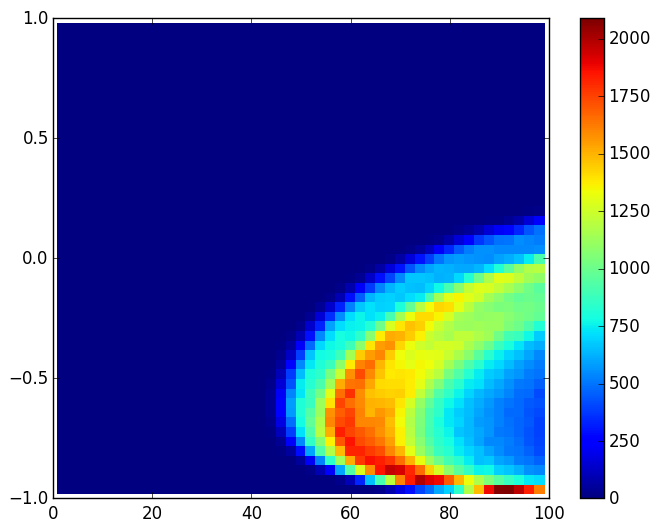

PyObject <matplotlib.colorbar.Colorbar object at 0x7fb6f00826d8>

In [16]:
pcolor(energy_50,pitch_50,reshape(A_a[144,:],50,50))
colorbar()

In [17]:
dw_dE = abs(energy_50[2]-energy_50[1])
dw_dP = abs(pitch_50[2]-pitch_50[1])
dtransfer = dw["dW"]/(dw_dE*dw_dP)/(4*pi);

In [ ]:
wavelength[]

In [ ]:
using NetCDF

nrows, ncols = size(A_a)
nen = length(energy_50)
np = length(pitch_50)
# Write transfer matrix to file
fname = "data/after_sawtooth_data.cdf"

isfile(fname) && rm(fname)

nrows_id = NcDim("nrows",nrows)
ncols_id = NcDim("ncols",ncols)
nwav_id = NcDim("nwav",length(wavelength))
nen_id = NcDim("energy",nen)
np_id = NcDim("pitch",np)

t_varid = NcVar("transfer_matrix",[nrows_id,ncols_id])
dw_varid = NcVar("dw",[nrows_id,ncols_id])
e_varid = NcVar("energy",nen_id)
p_varid = NcVar("pitch",np_id)
s_varid = NcVar("spectra",nrows_id)
wl_varid = NcVar("")
err_varid = NcVar("error",nrows_id)
ncid = NetCDF.create(fname,[t_varid,dw_varid,e_varid,p_varid,s_varid,err_varid],mode=NC_CLASSIC_MODEL)

NetCDF.putvar(ncid,"transfer_matrix",A_a)
NetCDF.putvar(ncid,"dw",dtransfer)
NetCDF.putvar(ncid,"energy",energy_50)
NetCDF.putvar(ncid,"pitch",pitch_50)
NetCDF.putvar(ncid,"spectra",spec_a)
NetCDF.putvar(ncid,"error",err_a)
NetCDF.close(ncid);

In [ ]:
nrows, ncols = size(A_b)
nen = length(energy_50)
np = length(pitch_50)
# Write transfer matrix to file
fname = "data/before_sawtooth_data.cdf"

isfile(fname) && rm(fname)

nrows_id = NcDim("nrows",nrows)
ncols_id = NcDim("ncols",ncols)
nen_id = NcDim("energy",nen)
np_id = NcDim("pitch",np)

t_varid = NcVar("transfer_matrix",[nrows_id,ncols_id])
dw_varid = NcVar("dw",[nrows_id,ncols_id])
e_varid = NcVar("energy",nen_id)
p_varid = NcVar("pitch",np_id)
s_varid = NcVar("spectra",nrows_id)
err_varid = NcVar("error",nrows_id)
ncid = NetCDF.create(fname,[t_varid,dw_varid,e_varid,p_varid,s_varid,err_varid],mode=NC_CLASSIC_MODEL)

NetCDF.putvar(ncid,"transfer_matrix",A_b)
NetCDF.putvar(ncid,"dw",dtransfer)
NetCDF.putvar(ncid,"energy",energy_50)
NetCDF.putvar(ncid,"pitch",pitch_50)
NetCDF.putvar(ncid,"spectra",spec_b)
NetCDF.putvar(ncid,"error",err_b)
NetCDF.close(ncid);

In [ ]:
A_b